### Librerias

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

# Configuración del cliente de BigQuery
from google.colab import auth
from google.cloud import bigquery
from google.auth import default
from tabulate import tabulate

#Bibliotecas
import matplotlib.pyplot as plt  # biblioteca de visualización
from plotly.offline import init_notebook_mode, iplot  # modo offline de plotly
import plotly.graph_objs as go  # objetos gráficos de plotly
import seaborn as sns  # biblioteca para gráficos estadísticos

auth.authenticate_user()
credentials, project = default()
client = bigquery.Client(credentials=credentials, project='tc-sc-bi-bigdata-ikea-corp-qa')

### Consulta de datos a BigQuery

In [ ]:
query="""
SELECT *
FROM tc-sc-bi-bigdata-ikea-corp-qa.cl_efop.sales
WHERE hfb = 96
"""

### Visualización de los datos

In [ ]:
from google.cloud import bigquery

query_job = client.query(query)  # Ejecuta la consulta
results = query_job.result()  # Espera a que la consulta se complete
df=results.to_dataframe()
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

+---+---------------------+----------------+-------------+------------+----------+--------+-----------------+------------------+----------+-----------------+-----+----------+------+-------+
|   |     Receipt_no      | Transaction_no | item_number |    date    | Quantity | price  | Discount_amount | item_description | Staff_id | Pos_terminal_no | hfb | turnover |  PA  | store |
+---+---------------------+----------------+-------------+------------+----------+--------+-----------------+------------------+----------+-----------------+-----+----------+------+-------+
| 0 |    221000085030     |     90886      |  598000133  | 2023-08-05 |   -1.0   | 1190.0 |       0.0       |   French fries   |   1041   |       221       | 96  |  1000.0  | 9631 |  594  |
| 1 |    222000127762     |     136867     |  598000133  | 2024-04-14 |   -1.0   | 1190.0 |       0.0       |   French fries   |   1283   |       222       | 96  |  1000.0  | 9631 |  594  |
| 2 |    423000036410     |     44993      |  5980

In [ ]:
df_cantidad_2 = df[df['Quantity'] == 2]
print(tabulate(df_cantidad_2.head(), headers='keys', tablefmt='pretty'))


+--------+---------------------+----------------+-------------+------------+----------+--------+-----------------+-----------------------------------+----------+-----------------+-----+---------------------+------+-------+
|        |     Receipt_no      | Transaction_no | item_number |    date    | Quantity | price  | Discount_amount |         item_description          | Staff_id | Pos_terminal_no | hfb |      turnover       |  PA  | store |
+--------+---------------------+----------------+-------------+------------+----------+--------+-----------------+-----------------------------------+----------+-----------------+-----+---------------------+------+-------+
| 52701  | 0000000172000000067 |      159       |  789000121  | 2022-08-11 |   2.0    | 590.0  |       0.0       | Mineral water without gas 500 ml. |   1007   |       172       | 96  | -991.5966386554622  | 9628 |  594  |
| 702892 | 0000000385000000742 |      2227      |  598000015  | 2023-02-06 |   2.0    | 4990.0 |       0.0  

In [ ]:
print(df_cantidad_2.shape)

(18, 14)


In [ ]:
dfo = df[df['Quantity'] <= 0]

### Limpieza de columnas

In [ ]:

columnas_a_eliminar = ['Transaction_no', 'Staff_id', 'Pos_terminal_no',]
dfo = dfo.drop(columnas_a_eliminar, axis=1)

In [ ]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2990284 entries, 0 to 2990385
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Receipt_no        object 
 1   item_number       object 
 2   date              dbdate 
 3   Quantity          float64
 4   price             float64
 5   Discount_amount   float64
 6   item_description  object 
 7   hfb               Int64  
 8   turnover          float64
 9   PA                object 
 10  store             Int64  
dtypes: Int64(2), dbdate(1), float64(4), object(4)
memory usage: 279.5+ MB


In [ ]:
# Calcula el número de valores nulos en cada columna
valores_nulos_por_columna = df.isnull().sum()

# Muestra el resultado
print(valores_nulos_por_columna)

Receipt_no          0
Transaction_no      0
item_number         0
date                0
Quantity            0
price               0
Discount_amount     0
item_description    0
Staff_id            0
Pos_terminal_no     0
hfb                 0
turnover            0
PA                  0
store               0
dtype: int64


In [ ]:
print(df.shape)

(2990386, 14)


In [ ]:
print(dfo.shape)

(2990284, 11)


In [ ]:

columnas_a_analizar = ['Quantity', 'Discount_amount']  # lista de columnas que quieres analizar

# Calcula estadísticas descriptivas solo para las columnas especificadas
descripcion = dfo[columnas_a_analizar].describe()
descripcion = descripcion.round(4)
# Muestra la tabla de estadísticas descriptivas
print(descripcion)

           Quantity  Discount_amount
count  2.990284e+06     2.990284e+06
mean  -1.388300e+00     1.585910e+01
std    2.102600e+00     2.685612e+02
min   -1.278000e+03     0.000000e+00
25%   -2.000000e+00     0.000000e+00
50%   -1.000000e+00     0.000000e+00
75%   -1.000000e+00     0.000000e+00
max   -1.000000e+00     9.200900e+04


In [ ]:
valor_minimo = dfo['Quantity'].min()

# Muestra el valor mínimo
print("El valor mínimo en la columna es:", valor_minimo)

El valor mínimo en la columna es: -1278.0


In [ ]:
dfo['Quantity'] = dfo['Quantity'].abs()
dfl = dfo[dfo['Quantity'] > 20]
print(tabulate(dfl.head(), headers='keys', tablefmt='pretty'))
print(dfl.shape)

+-------+---------------------+-------------+------------+----------+--------+-----------------+------------------+-----+--------------------+------+-------+
|       |     Receipt_no      | item_number |    date    | Quantity | price  | Discount_amount | item_description | hfb |      turnover      |  PA  | store |
+-------+---------------------+-------------+------------+----------+--------+-----------------+------------------+-----+--------------------+------+-------+
| 3490  | 0000000222000013632 |  598000087  | 2022-10-19 |   50.0   | 490.0  |       0.0       |    Ice Cream     | 96  | 20588.235294117647 | 9635 |  594  |
| 3491  | 0000000221000060182 |  598000087  | 2023-03-30 |  200.0   | 490.0  |       0.0       |    Ice Cream     | 96  | 82352.94117647059  | 9635 |  594  |
| 33360 |    423000039081     |  598000190  | 2023-09-15 |   25.0   | 1490.0 |       0.0       |     Choripan     | 96  | 31302.521008403364 | 9636 |  636  |
| 50065 |    443000042261     |  598000142  | 2023-1

In [ ]:
dff = dfo[dfo['Quantity'] <= 20]
print(tabulate(dff.head(), headers='keys', tablefmt='pretty'))
print(dff.shape)

+---+---------------------+-------------+------------+----------+--------+-----------------+------------------+-----+----------+------+-------+
|   |     Receipt_no      | item_number |    date    | Quantity | price  | Discount_amount | item_description | hfb | turnover |  PA  | store |
+---+---------------------+-------------+------------+----------+--------+-----------------+------------------+-----+----------+------+-------+
| 0 |    221000085030     |  598000133  | 2023-08-05 |   1.0    | 1190.0 |       0.0       |   French fries   | 96  |  1000.0  | 9631 |  594  |
| 1 |    222000127762     |  598000133  | 2024-04-14 |   1.0    | 1190.0 |       0.0       |   French fries   | 96  |  1000.0  | 9631 |  594  |
| 2 |    423000036410     |  598000133  | 2023-08-27 |   1.0    | 1190.0 |       0.0       |   French fries   | 96  |  1000.0  | 9631 |  636  |
| 3 | 0000000222000002870 |  598000133  | 2022-08-19 |   1.0    | 1190.0 |       0.0       |   French fries   | 96  |  1000.0  | 9631 | 

In [ ]:
columnas_a_analizar = ['Quantity', 'Discount_amount']  # lista de columnas que quieres analizar

# Calcula estadísticas descriptivas solo para las columnas especificadas
descripcion = dff[columnas_a_analizar].describe()
descripcion = descripcion.round(4)
# Muestra la tabla de estadísticas descriptivas
print(descripcion)

           Quantity  Discount_amount
count  2.990208e+06     2.990208e+06
mean   1.383200e+00     1.579880e+01
std    7.537000e-01     2.580822e+02
min    1.000000e+00     0.000000e+00
25%    1.000000e+00     0.000000e+00
50%    1.000000e+00     0.000000e+00
75%    2.000000e+00     0.000000e+00
max    2.000000e+01     1.840200e+04


In [ ]:
# Utiliza el método groupby() para agrupar por el nombre del producto y suma las cantidades vendidas
ventas_por_producto = dff.groupby('item_description')['Quantity'].sum()

# Muestra el total de productos vendidos
print(ventas_por_producto)

item_description
1 Pan plus (varieties) + 1 Not Milk Low Fat 1 L       3.0
2X Chips Apple 30g                                  314.0
2X Chips Carrot 30g                                 207.0
2X Chips Onion 30grs                                194.0
2X Gingerbread Dough, Fr 500g                        44.0
                                                    ...  
Yogurt Museli & Fruit                              1634.0
Yogurt colun light blackberry 125 gr.                93.0
Yogurt colun light raspberry 125 g                   22.0
Yogurt colun light strawberry 125 gr.               191.0
Yogurt colun light vanilla 125 gr.                  144.0
Name: Quantity, Length: 307, dtype: float64


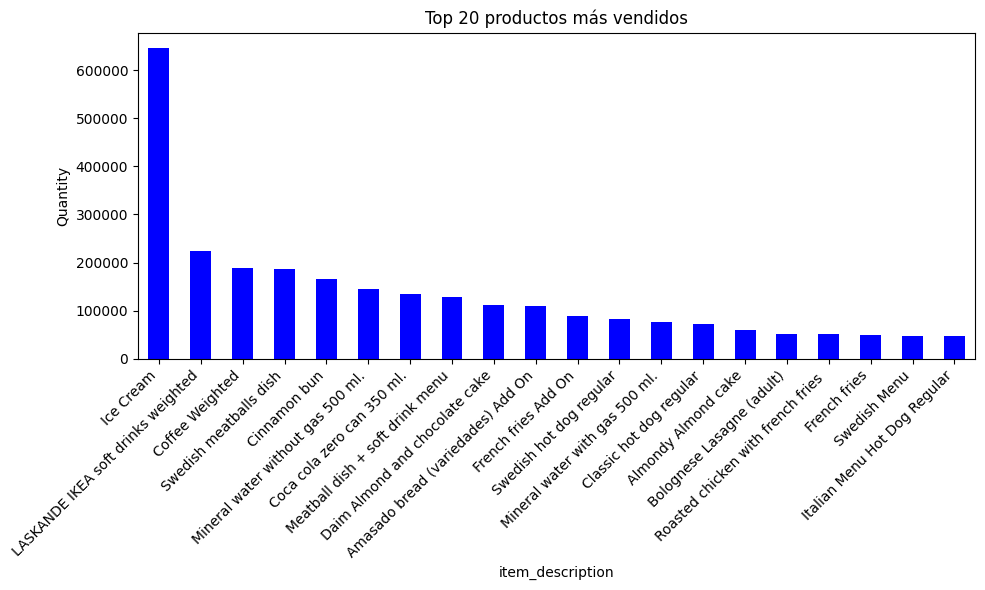

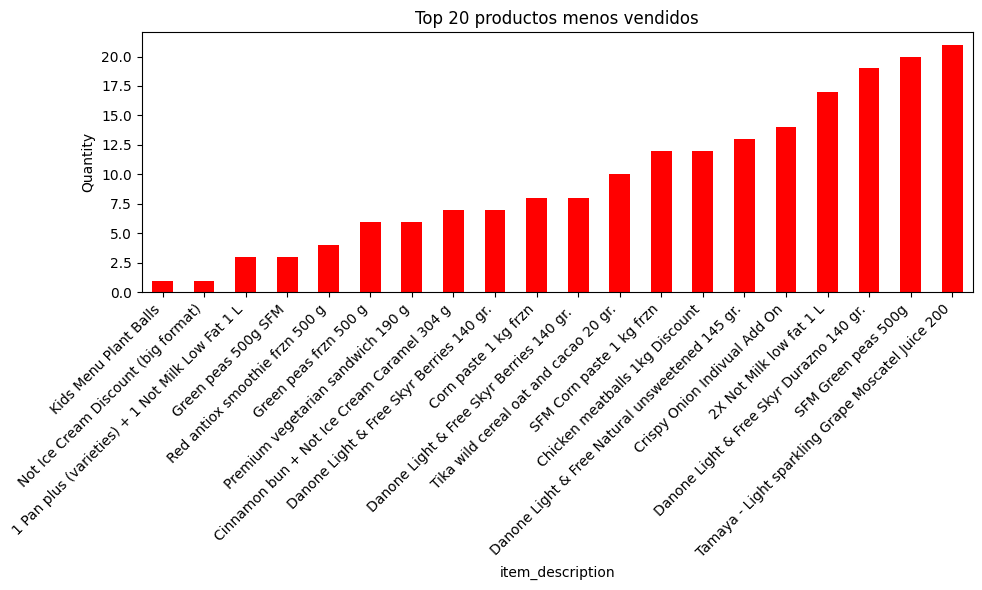

In [ ]:
#Ordena los productos por las cantidades totales vendidas en orden descendente
top_20_mas_vendidos = ventas_por_producto.sort_values(ascending=False).head(20)
bottom_20_menos_vendidos = ventas_por_producto.sort_values(ascending=True).head(20)

# Crea el gráfico de los 20 productos más vendidos
plt.figure(figsize=(10, 6))
top_20_mas_vendidos.plot(kind='bar', color='blue')
plt.title('Top 20 productos más vendidos')
plt.xlabel('item_description'
)
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Crea el gráfico de los 20 productos menos vendidos
plt.figure(figsize=(10, 6))
bottom_20_menos_vendidos.plot(kind='bar', color='red')
plt.title('Top 20 productos menos vendidos')
plt.xlabel('item_description')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

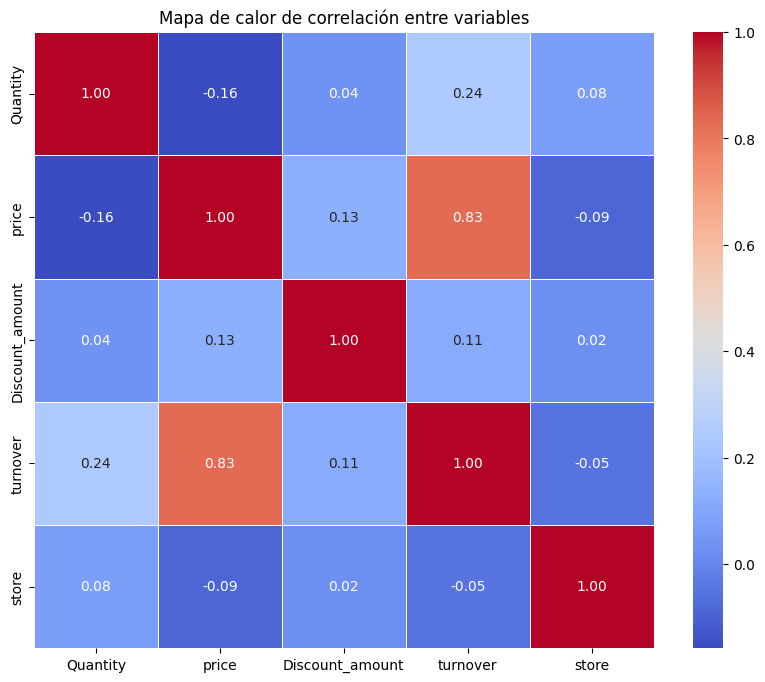

In [ ]:
# Selecciona solo las columnas numéricas excluyendo 'HFB'
numeric_cols = dff.select_dtypes(include=['int', 'float']).drop(columns=['hfb']).columns

# Calcula la matriz de correlación solo para estas columnas
correlation_matrix = dff[numeric_cols].corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

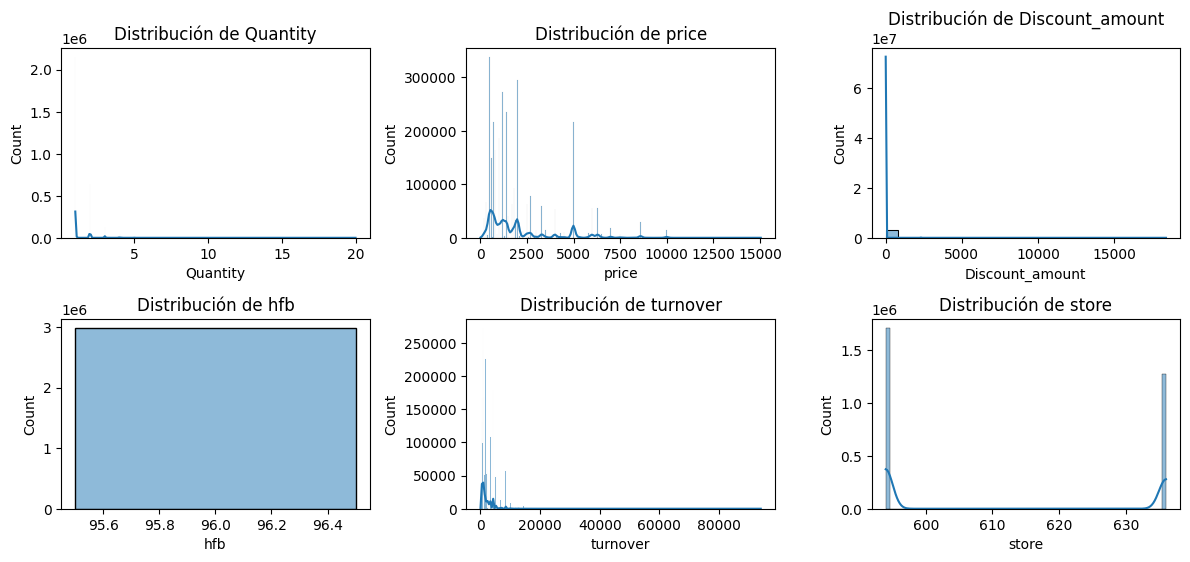

In [ ]:
#Filtra solo las columnas numéricas
numeric_cols = dff.select_dtypes(include=['float64', 'int64'])

# Define el tamaño y diseño del gráfico
plt.figure(figsize=(12, 8))

# Itera sobre las columnas numéricas y grafica las distribuciones
for i, col in enumerate(numeric_cols.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(dff[col], kde=True)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

Resultados del análisis de distribución:
Distribución: norm, Estadístico: 0.24691315229458227, Valor P: 0.0
Distribución: expon, Estadístico: 0.17531997382651393, Valor P: 0.0
Distribución: uniform, Estadístico: 0.6169894946953831, Valor P: 0.0
Distribución: gamma, Estadístico: 0.13891382805758545, Valor P: 0.0

La mejor distribución ajustada es: gamma


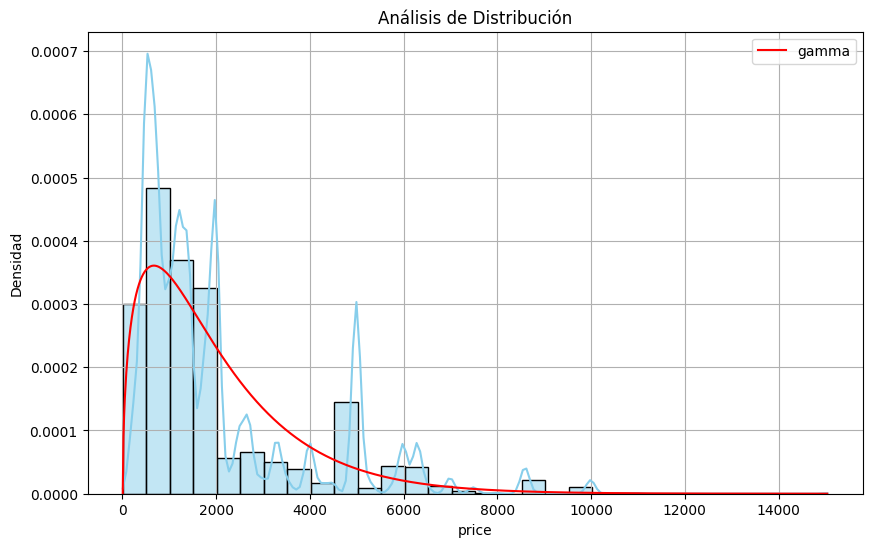

In [ ]:
import seaborn as sns
from scipy import stats
import numpy as np
# Extrae los datos de la columna que quieres analizar
datos = dff['price'].dropna()

# Calcula la media y la desviación estándar de los datos
media = datos.mean()
std_dev = datos.std()

# Ajusta diferentes distribuciones a los datos y calcula el ajuste de cada una
distribuciones = ['norm', 'expon', 'uniform', 'gamma']  # Puedes agregar otras distribuciones según sea necesario
resultados = {}

for distribucion in distribuciones:
    # Ajusta la distribución a los datos
    distribucion_actual = getattr(stats, distribucion)
    params = distribucion_actual.fit(datos)

    # Calcula el ajuste de la distribución
    estadisticas, p_valor = stats.kstest(datos, distribucion, args=params)

    # Guarda los resultados
    resultados[distribucion] = {'params': params, 'statistic': estadisticas, 'p_value': p_valor}

# Encuentra la mejor distribución ajustada basada en el menor valor estadístico
mejor_distribucion = min(resultados, key=lambda x: resultados[x]['statistic'])

# Imprime los resultados
print("Resultados del análisis de distribución:")
for distribucion, resultado in resultados.items():
    print(f"Distribución: {distribucion}, Estadístico: {resultado['statistic']}, Valor P: {resultado['p_value']}")

print(f"\nLa mejor distribución ajustada es: {mejor_distribucion}")

# Grafica un histograma de los datos
plt.figure(figsize=(10, 6))
sns.histplot(datos, kde=True, color='skyblue', stat='density', bins=30)

# Grafica la mejor distribución ajustada
x = np.linspace(datos.min(), datos.max(), 1000)
mejor_params = resultados[mejor_distribucion]['params']
pdf = getattr(stats, mejor_distribucion).pdf(x, *mejor_params)
plt.plot(x, pdf, 'r-', label=mejor_distribucion)

plt.title('Análisis de Distribución')
plt.xlabel('price')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

Resultados del análisis de distribución:
Distribución: norm, Estadístico: 0.2270695728851334, Valor P: 0.0
Distribución: expon, Estadístico: 0.14626924667548794, Valor P: 0.0
Distribución: uniform, Estadístico: 0.8961547365320965, Valor P: 0.0
Distribución: gamma, Estadístico: 0.22023922118610323, Valor P: 0.0

La mejor distribución ajustada es: expon


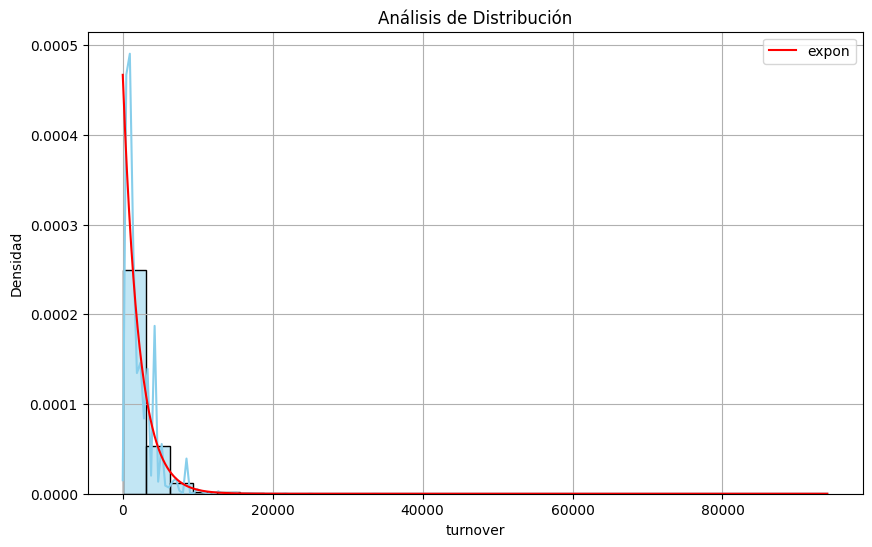

In [ ]:
import seaborn as sns
from scipy import stats
import numpy as np
# Extrae los datos de la columna que quieres analizar
datos = dff['turnover'].dropna()

# Calcula la media y la desviación estándar de los datos
media = datos.mean()
std_dev = datos.std()

# Ajusta diferentes distribuciones a los datos y calcula el ajuste de cada una
distribuciones = ['norm', 'expon', 'uniform', 'gamma']  # Puedes agregar otras distribuciones según sea necesario
resultados = {}

for distribucion in distribuciones:
    # Ajusta la distribución a los datos
    distribucion_actual = getattr(stats, distribucion)
    params = distribucion_actual.fit(datos)

    # Calcula el ajuste de la distribución
    estadisticas, p_valor = stats.kstest(datos, distribucion, args=params)

    # Guarda los resultados
    resultados[distribucion] = {'params': params, 'statistic': estadisticas, 'p_value': p_valor}

# Encuentra la mejor distribución ajustada basada en el menor valor estadístico
mejor_distribucion = min(resultados, key=lambda x: resultados[x]['statistic'])

# Imprime los resultados
print("Resultados del análisis de distribución:")
for distribucion, resultado in resultados.items():
    print(f"Distribución: {distribucion}, Estadístico: {resultado['statistic']}, Valor P: {resultado['p_value']}")

print(f"\nLa mejor distribución ajustada es: {mejor_distribucion}")

# Grafica un histograma de los datos
plt.figure(figsize=(10, 6))
sns.histplot(datos, kde=True, color='skyblue', stat='density', bins=30)

# Grafica la mejor distribución ajustada
x = np.linspace(datos.min(), datos.max(), 1000)
mejor_params = resultados[mejor_distribucion]['params']
pdf = getattr(stats, mejor_distribucion).pdf(x, *mejor_params)
plt.plot(x, pdf, 'r-', label=mejor_distribucion)

plt.title('Análisis de Distribución')
plt.xlabel('turnover')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

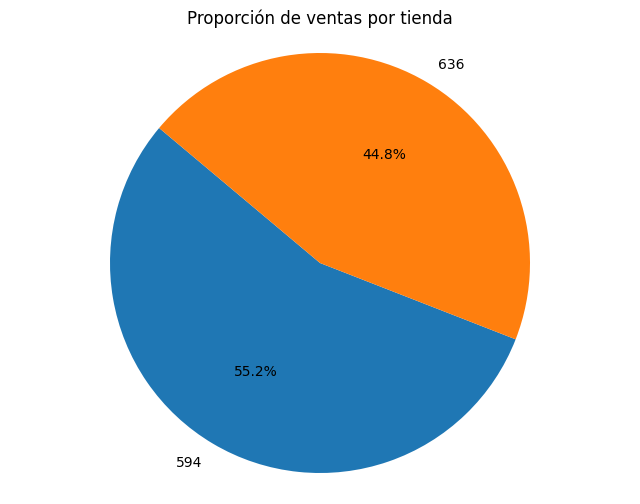

In [ ]:
# Agrupa por tienda y suma la cantidad vendida en cada tienda
ventas_por_tienda = dff.groupby('store')['Quantity'].sum()

# Crea un gráfico de torta para mostrar la proporción de ventas por tienda
plt.figure(figsize=(8, 6))
plt.pie(ventas_por_tienda, labels=ventas_por_tienda.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de ventas por tienda')
plt.axis('equal')  # Ajusta los ejes para que el gráfico sea circular
plt.show()

# Eda Series de tiempo

In [ ]:
dff2=dff.copy()
dff2.columns

Index(['Receipt_no', 'item_number', 'date', 'Quantity', 'price',
       'Discount_amount', 'item_description', 'hfb', 'turnover', 'PA',
       'store'],
      dtype='object')

In [ ]:
cols = ['Receipt_no', 'item_number', 'price',
       'Discount_amount', 'item_description', 'hfb', 'PA',
       'store', 'Quantity']
dff2.drop(cols, axis=1, inplace=True)


Agrupación de ventas

In [ ]:
temp = dff2.groupby('date')['turnover'].size()
temp[temp > 1].sort_values(ascending=False)

date
2024-03-02    11320
2024-03-30    11196
2024-03-03    10963
2024-03-09    10878
2022-12-17    10787
              ...  
2023-06-22     1197
2022-08-05     1061
2022-07-27      447
2022-07-29      280
2022-07-26        5
Name: turnover, Length: 631, dtype: int64

In [ ]:

dff2 = dff2.groupby('date')['turnover'].sum().reset_index()
dff2 = dff2.set_index('date')
dff2.index
dff2.sample(10)

,turnover
date,
2023-07-31,6.360321e+06
2024-02-16,1.076931e+07
2022-08-21,1.260079e+07
2022-11-21,2.931778e+06
2023-11-28,6.954483e+06
2023-11-11,1.882405e+07
2023-07-05,7.226079e+06
2023-11-15,5.975314e+06
2023-04-23,1.804232e+07


# Visualización de las Serie de tiempo

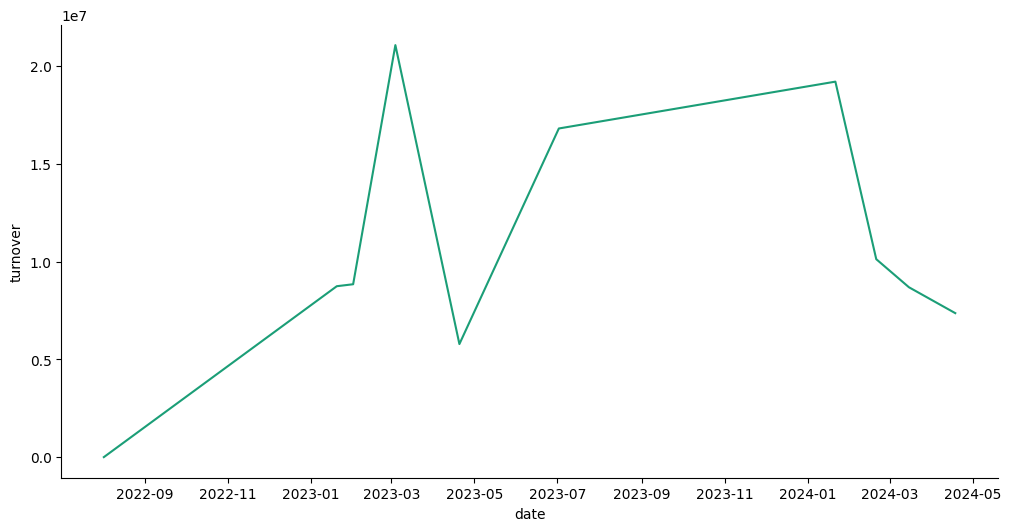

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['turnover']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('turnover')

<Figure size 2000x800 with 0 Axes>

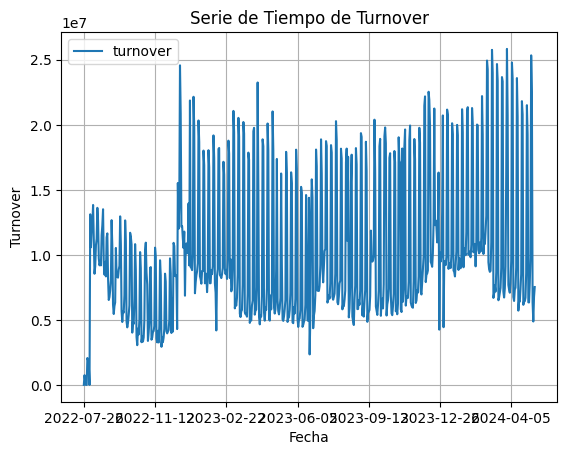

In [ ]:
plt.figure(figsize=(20, 8))  # Ajusta el tamaño de la figura
dff2.plot()
plt.title('Serie de Tiempo de Turnover')
plt.xlabel('Fecha')
plt.ylabel('Turnover')
plt.grid(True)
plt.show()


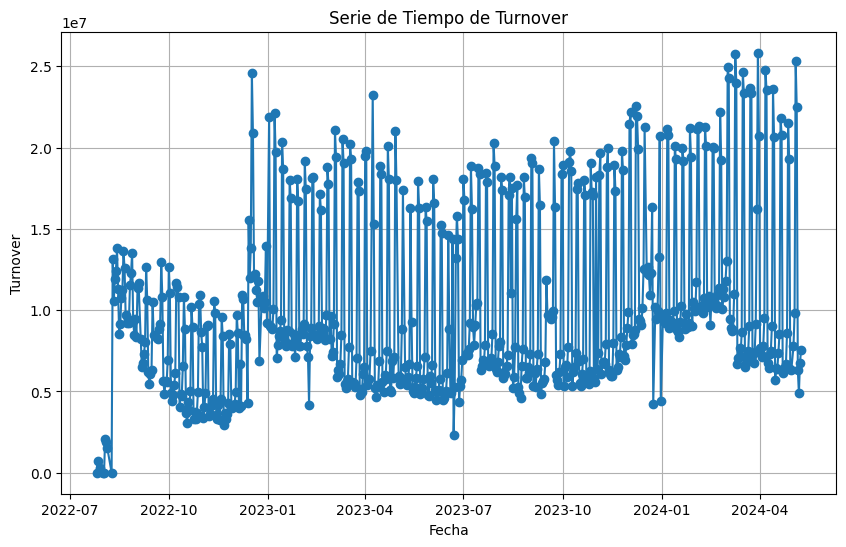

In [ ]:
import matplotlib.pyplot as plt

# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(dff2.index, dff2['turnover'], marker='o', linestyle='-')
plt.title('Serie de Tiempo de Turnover')
plt.xlabel('Fecha')
plt.ylabel('Turnover')
plt.grid(True)
plt.show()

In [ ]:
pd.DatetimeIndex(dff2.index).year
pd.DatetimeIndex(dff2.index).month
pd.DatetimeIndex(dff2.index).day

Index([26, 27, 29,  1,  2,  3,  4,  5,  9, 10,
       ...
       29, 30,  2,  3,  4,  5,  6,  7,  8,  9],
      dtype='int32', name='date', length=634)

In [ ]:
dff2['Year'] = pd.DatetimeIndex(dff2.index).year
dff2['Month'] = pd.DatetimeIndex(dff2.index).month
dff2['Day'] = pd.DatetimeIndex(dff2.index).day
# Display a random sampling of 5 rows
dff2.sample(10, random_state=0)

,turnover,Year,Month,Day
date,,,,
2024-01-21,1.919894e+07,2024,1,21
2023-09-30,1.834486e+07,2023,9,30
2023-10-25,5.432982e+06,2023,10,25
2023-08-28,5.827326e+06,2023,8,28
2024-03-13,7.653934e+06,2024,3,13
2022-10-18,3.055730e+06,2022,10,18
2023-08-09,6.046053e+06,2023,8,9
2023-12-22,1.230958e+07,2023,12,22
2023-03-04,2.106750e+07,2023,3,4


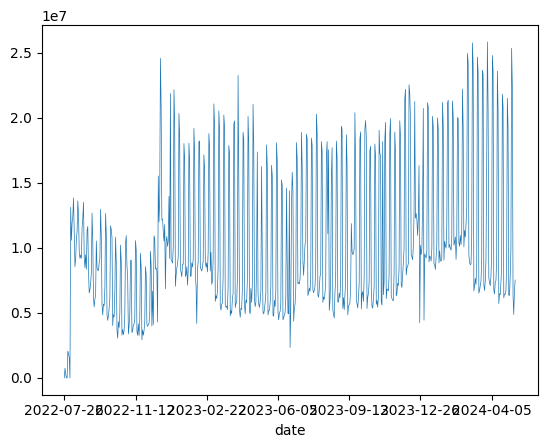

In [ ]:
dff2['turnover'].plot(linewidth=0.5);

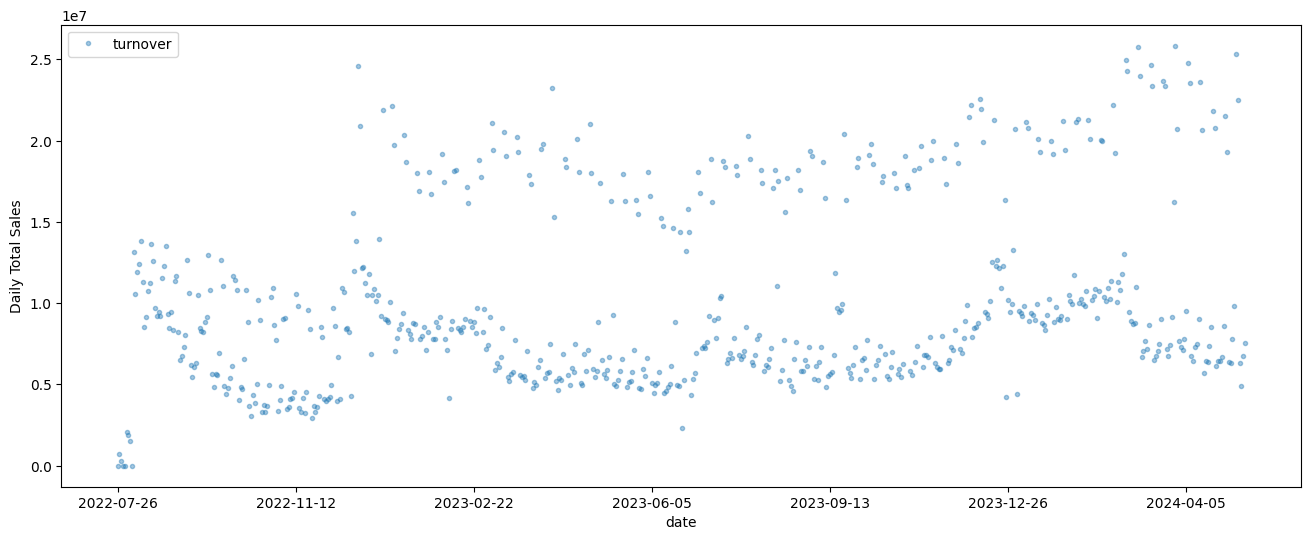

In [ ]:
# Use seaborn style defaults and set the default figure size
# sns.set(rc={'figure.figsize':(18, 6)})

cols_plot = ['turnover']

axes      = dff2[cols_plot].plot(marker='.',
                                       alpha=0.4,
                                       linestyle='None',
                                       figsize=(16, 6),
                                       subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Total Sales')

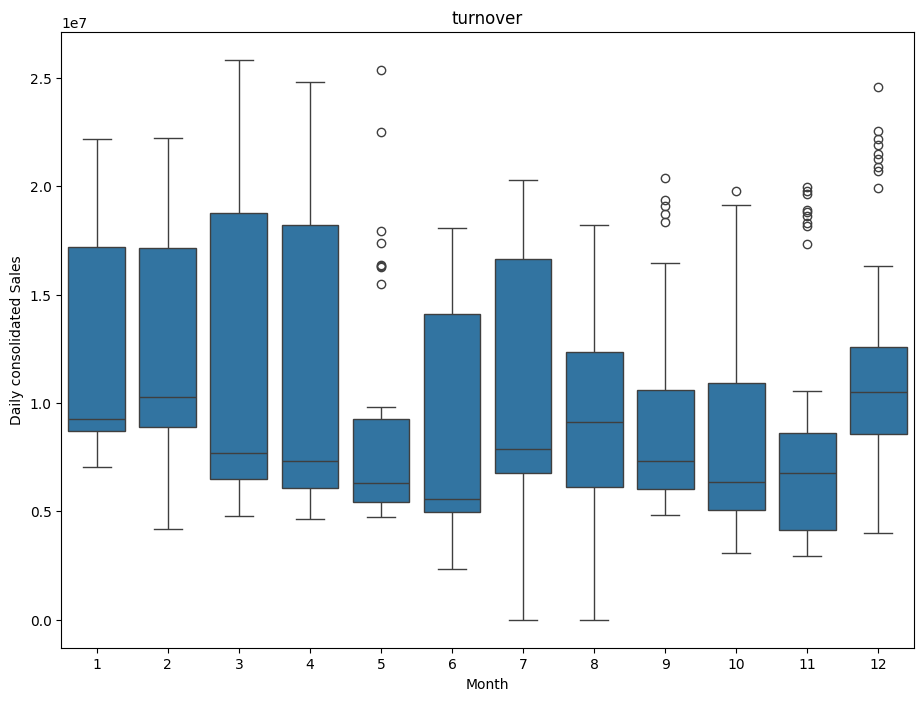

In [ ]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=dff2, x='Month', y='turnover', ax=ax)

ax.set_title('turnover')

ax.set_ylabel('Daily consolidated Sales');

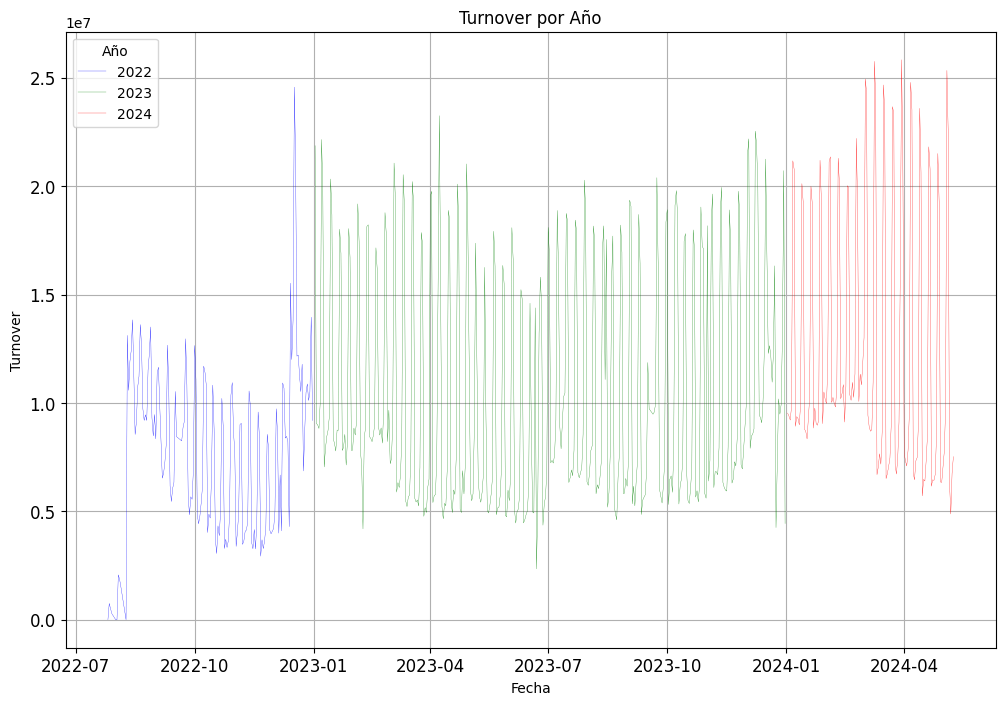

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Definir los colores para cada año
colors = ['blue', 'green', 'red']

# Iterar sobre los años y trazar cada serie de tiempo
for i, year in enumerate([2022, 2023, 2024]):
    dff_year = dff2[dff2['Year'] == year]
    plt.plot(dff_year.index, dff_year['turnover'], linewidth=0.20, label=str(year), color=colors[i])

# Agregar etiquetas y leyenda
plt.title('Turnover por Año')
plt.xlabel('Fecha')
plt.ylabel('Turnover')
plt.legend(title='Año')

# Ajustar el tamaño de la fuente de las etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

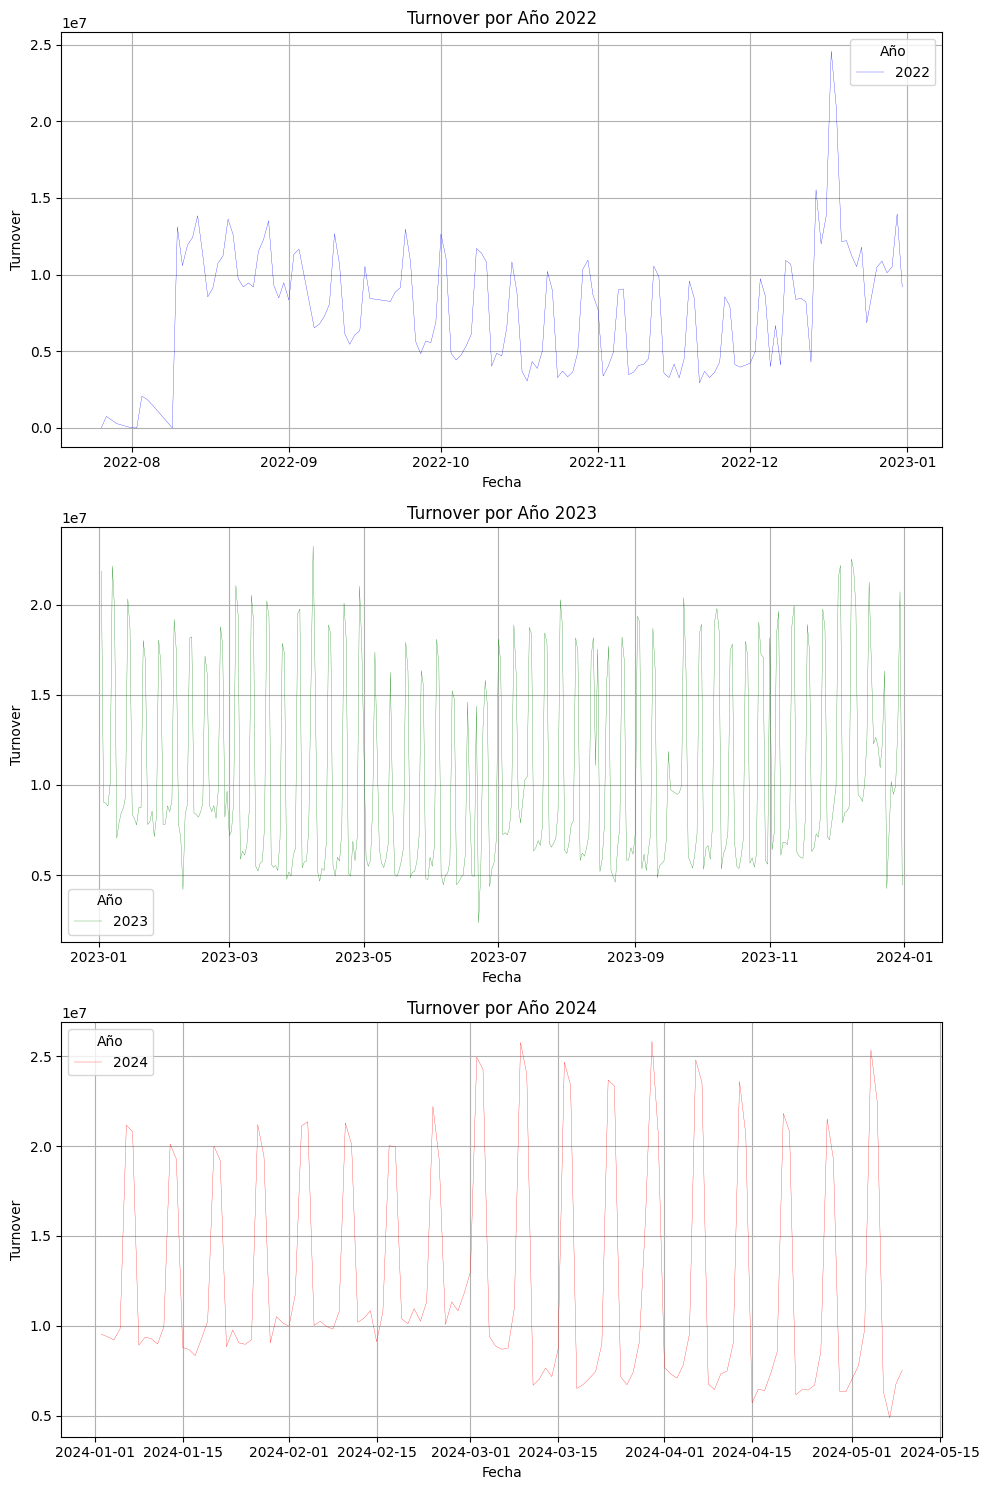

In [ ]:
# Crear subplots con 3 filas y 1 columna
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Definir los colores para cada año
colors = ['blue', 'green', 'red']

# Iterar sobre los años y trazar cada serie de tiempo en su respectivo subplot
for i, year in enumerate([2022, 2023, 2024]):
    dff_year = dff2[dff2['Year'] == year]
    axs[i].plot(dff_year.index, dff_year['turnover'], linewidth=0.20, label=str(year), color=colors[i])
    axs[i].set_title(f'Turnover por Año {year}')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Turnover')
    axs[i].legend(title='Año')
    axs[i].grid(True)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Chequeo de tendencia

In [ ]:

def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.xticks(rotation=90)
    plt.plot(X_df,
             marker='.',
             linestyle='-',
             linewidth=0.5,
             color='blue',
             label='Original')

    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
             marker='o',
             markersize=8,
             linestyle='-',
             linewidth=0.5,
             color='orange',
             label='Regression line');
    plt.legend()
    plt.show()

Slope 10168.83857711418
NRMSE: 0.16129696683573894


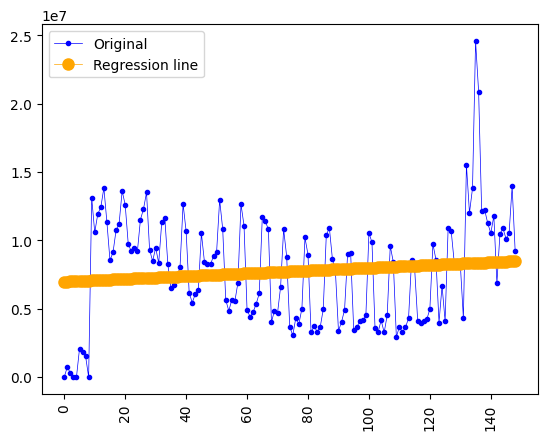

Slope 1934.1017702527847
NRMSE: 0.2601737748638415


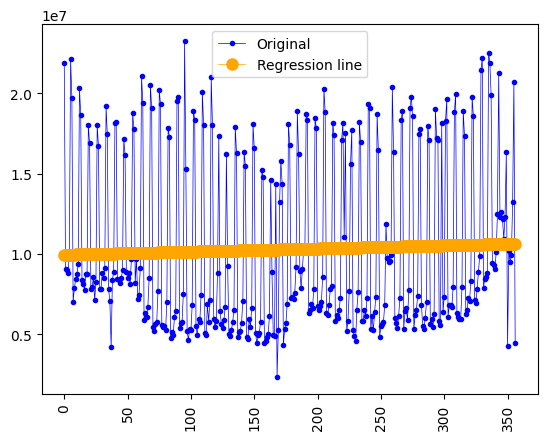

Slope -11395.416914476813
NRMSE: 0.2961233299682313


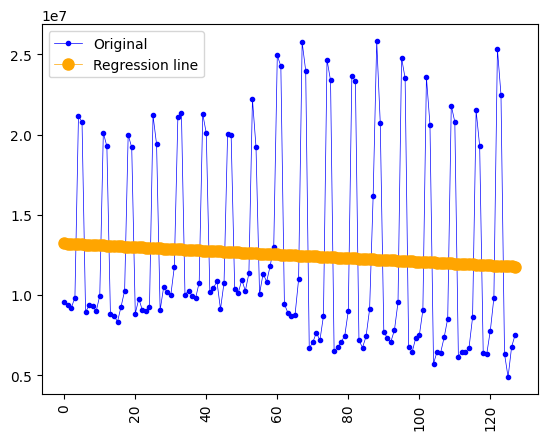

In [ ]:
# check for trend
cols_plot = ['turnover']

detect_trend(dff2.loc[dff2['Year'] == 2022]['turnover'].values)

detect_trend(dff2.loc[dff2['Year'] == 2023]['turnover'].values)

detect_trend(dff2.loc[dff2['Year'] == 2024]['turnover'].values)



In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Crear una copia del DataFrame original
dff2_copy = dff2.copy()

# Convertir la columna de fecha a tipo datetime en la copia
dff2_copy['date'] = pd.to_datetime(dff2_copy['date'])

# Establecer la columna de fecha como el índice del DataFrame copiado
dff2_copy.set_index('date', inplace=True)

# Descomposición estacional en la copia del DataFrame
result_additive = seasonal_decompose(dff2_copy['turnover'], model='additive')
result_additive.plot()
plt.show()

KeyError: 'date'